# Exploratory Data Analysis of GOES - GLM/ABI and ERA5 Data
Previous work has enabled me to retrieve and process large volumes of climate data from the three following sources: GOES-GLM, GOES-ABI, and ERA5 environmental variables on single levels and pressure levels. In this notebook, I investigate the quality of this data at the two primary stages of processing, temporal agreggation and spatial downsampling. To do this, I will produce visuals and check for missing data. Next, I will do correlational analysis between the lightning data and the environmental variables. Afterwards, I will check cross correlations between environmental variables. Then, I will investigate the distribution of my data using histograms, heatmaps, and time series analysis.

We will begin by loading in 1 months worth of data using the retrieve GLM function in data retriever 2.

In [1]:
# imports
from data_retreiver_2 import retrieve_goes_glmf, parallel_interp
import xarray as xr
import cdsapi
import netCDF4 as nc
from goes2go import GOES
import requests
from datetime import datetime, timedelta
import os
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
from concurrent.futures import ProcessPoolExecutor, as_completed
import numpy as np
from numba import njit, prange
from scipy.interpolate import griddata
from scipy.spatial import cKDTree
import multiprocessing
import time
import dask
from dask import delayed, compute



In [6]:
import os, glob
for file in glob.glob("OR_*"):
    os.remove(file)
    print(f"Deleted: {file}")


Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425184000.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425181000.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425182500.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425180500.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425183000.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425182000.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425183500.nc
Deleted: OR_GLM-L2-GLMF-M3_G16_e20200425181500.nc


In [3]:
start_date = datetime(2020, 4, 1)
end_date = datetime(2020, 4, 30)
daily_files = []

def process_day(date):
    """Processes a single day's data."""
    output_file = f"{date.strftime('%B%Y')}/FED_Window_{date.strftime('%Y%m%d')}.nc"
    print(f"Processing: {date.strftime('%Y-%m-%d')}")
    retrieve_goes_glmf(date, output_file)  # Process daily data
    return output_file

for i in range((end_date - start_date).days + 1):
    daily_files.append(process_day(start_date + timedelta(days=i)))

print("Finished processing all days!")



Processing: 2020-04-01


Processing files for year 2020, day 92, hour 1Processing files for year 2020, day 92, hour 0Processing files for year 2020, day 92, hour 3Processing files for year 2020, day 92, hour 2



Processing files for year 2020, day 92, hour 4
Processing files for year 2020, day 92, hour 5
Processing files for year 2020, day 92, hour 6
Processing files for year 2020, day 92, hour 7
Processing files for year 2020, day 92, hour 8
Processing files for year 2020, day 92, hour 9
Processing files for year 2020, day 92, hour 10
Processing files for year 2020, day 92, hour 11
Processing files for year 2020, day 92, hour 12
Processing files for year 2020, day 92, hour 13
Processing files for year 2020, day 92, hour 14
Processing files for year 2020, day 92, hour 15
Processing files for year 2020, day 92, hour 16
Processing files for year 2020, day 92, hour 17
Processing files for year 2020, day 92, hour 18
Processing files for year 2020, day 92, hour 19
Processing files for year 2020, day 92, hour 20
Pr

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200401.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-02
Processing files for year 2020, day 93, hour 0Processing files for year 2020, day 93, hour 1Processing files for year 2020, day 93, hour 2Processing files for year 2020, day 93, hour 3



Processing files for year 2020, day 93, hour 4
Processing files for year 2020, day 93, hour 5
Processing files for year 2020, day 93, hour 6
Processing files for year 2020, day 93, hour 7
Processing files for year 2020, day 93, hour 8
Processing files for year 2020, day 93, hour 9
Processing files for year 2020, day 93, hour 10
Processing files for year 2020, day 93, hour 11
Processing files for year 2020, day 93, hour 12
Processing files for year 2020, day 93, hour 13
Processing files for year 2020, day 93, hour 14
Processing files for year 2020, day 93, hour 15
Processing files for year 2020, day 93, hour 16
Processing files for year 2020, day 93, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200402.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-03
Processing files for year 2020, day 94, hour 0Processing files for year 2020, day 94, hour 1Processing files for year 2020, day 94, hour 2Processing files for year 2020, day 94, hour 3



Processing files for year 2020, day 94, hour 4
Processing files for year 2020, day 94, hour 5
Processing files for year 2020, day 94, hour 6
Processing files for year 2020, day 94, hour 7
Processing files for year 2020, day 94, hour 8
Processing files for year 2020, day 94, hour 9
Processing files for year 2020, day 94, hour 10
Processing files for year 2020, day 94, hour 11
Processing files for year 2020, day 94, hour 12
Processing files for year 2020, day 94, hour 13
Processing files for year 2020, day 94, hour 14
Processing files for year 2020, day 94, hour 15
Processing files for year 2020, day 94, hour 16
Processing files for year 2020, day 94, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200403.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-04
Processing files for year 2020, day 95, hour 0Processing files for year 2020, day 95, hour 1Processing files for year 2020, day 95, hour 2Processing files for year 2020, day 95, hour 3



Processing files for year 2020, day 95, hour 4
Processing files for year 2020, day 95, hour 5
Processing files for year 2020, day 95, hour 6
Processing files for year 2020, day 95, hour 7
Processing files for year 2020, day 95, hour 8
Processing files for year 2020, day 95, hour 9
Processing files for year 2020, day 95, hour 10
Processing files for year 2020, day 95, hour 11
Processing files for year 2020, day 95, hour 12
Processing files for year 2020, day 95, hour 13
Processing files for year 2020, day 95, hour 14
Processing files for year 2020, day 95, hour 15
Processing files for year 2020, day 95, hour 16
Processing files for year 2020, day 95, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200404.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-05
Processing files for year 2020, day 96, hour 0Processing files for year 2020, day 96, hour 3Processing files for year 2020, day 96, hour 2Processing files for year 2020, day 96, hour 1



Processing files for year 2020, day 96, hour 4
Processing files for year 2020, day 96, hour 5
Processing files for year 2020, day 96, hour 6
Processing files for year 2020, day 96, hour 7
Processing files for year 2020, day 96, hour 8
Processing files for year 2020, day 96, hour 9
Processing files for year 2020, day 96, hour 10
Processing files for year 2020, day 96, hour 11
Processing files for year 2020, day 96, hour 12
Processing files for year 2020, day 96, hour 13
Processing files for year 2020, day 96, hour 14
Processing files for year 2020, day 96, hour 15
Processing files for year 2020, day 96, hour 16
Processing files for year 2020, day 96, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200405.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-06
Processing files for year 2020, day 97, hour 1Processing files for year 2020, day 97, hour 0Processing files for year 2020, day 97, hour 3Processing files for year 2020, day 97, hour 2



Processing files for year 2020, day 97, hour 4
Processing files for year 2020, day 97, hour 5
Processing files for year 2020, day 97, hour 6
Processing files for year 2020, day 97, hour 7
Processing files for year 2020, day 97, hour 8
Processing files for year 2020, day 97, hour 9
Processing files for year 2020, day 97, hour 10
Processing files for year 2020, day 97, hour 11
Processing files for year 2020, day 97, hour 12
Processing files for year 2020, day 97, hour 13
Processing files for year 2020, day 97, hour 14
Processing files for year 2020, day 97, hour 15
Processing files for year 2020, day 97, hour 16
Processing files for year 2020, day 97, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200406.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-07
Processing files for year 2020, day 98, hour 0Processing files for year 2020, day 98, hour 3Processing files for year 2020, day 98, hour 1Processing files for year 2020, day 98, hour 2



Processing files for year 2020, day 98, hour 4
Processing files for year 2020, day 98, hour 5
Processing files for year 2020, day 98, hour 6
Processing files for year 2020, day 98, hour 7
Processing files for year 2020, day 98, hour 8
Processing files for year 2020, day 98, hour 9
Processing files for year 2020, day 98, hour 10
Processing files for year 2020, day 98, hour 11
Processing files for year 2020, day 98, hour 12
Processing files for year 2020, day 98, hour 13
Processing files for year 2020, day 98, hour 14
Processing files for year 2020, day 98, hour 15
Processing files for year 2020, day 98, hour 16
Processing files for year 2020, day 98, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200407.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-08
Processing files for year 2020, day 99, hour 0Processing files for year 2020, day 99, hour 1Processing files for year 2020, day 99, hour 2Processing files for year 2020, day 99, hour 3



Processing files for year 2020, day 99, hour 4
Processing files for year 2020, day 99, hour 5
Processing files for year 2020, day 99, hour 6
Processing files for year 2020, day 99, hour 7
Processing files for year 2020, day 99, hour 8
Processing files for year 2020, day 99, hour 9
Processing files for year 2020, day 99, hour 10
Processing files for year 2020, day 99, hour 11
Processing files for year 2020, day 99, hour 12
Processing files for year 2020, day 99, hour 13
Processing files for year 2020, day 99, hour 14
Processing files for year 2020, day 99, hour 15
Processing files for year 2020, day 99, hour 16
Processing files for year 2020, day 99, hour 17
Processing file

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200408.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-09
Processing files for year 2020, day 100, hour 0Processing files for year 2020, day 100, hour 2Processing files for year 2020, day 100, hour 1Processing files for year 2020, day 100, hour 3



Processing files for year 2020, day 100, hour 4
Processing files for year 2020, day 100, hour 5
Processing files for year 2020, day 100, hour 6
Processing files for year 2020, day 100, hour 7
Processing files for year 2020, day 100, hour 8
Processing files for year 2020, day 100, hour 9
Processing files for year 2020, day 100, hour 10
Processing files for year 2020, day 100, hour 11
Processing files for year 2020, day 100, hour 12
Processing files for year 2020, day 100, hour 13
Processing files for year 2020, day 100, hour 14
Processing files for year 2020, day 100, hour 15
Processing files for year 2020, day 100, hour 16
Processing files for year 2020, day 100, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200409.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-10
Processing files for year 2020, day 101, hour 0Processing files for year 2020, day 101, hour 2Processing files for year 2020, day 101, hour 1Processing files for year 2020, day 101, hour 3



Processing files for year 2020, day 101, hour 4
Processing files for year 2020, day 101, hour 5
Processing files for year 2020, day 101, hour 6
Processing files for year 2020, day 101, hour 7
Processing files for year 2020, day 101, hour 8
Processing files for year 2020, day 101, hour 9
Processing files for year 2020, day 101, hour 10
Processing files for year 2020, day 101, hour 11
Processing files for year 2020, day 101, hour 12
Processing files for year 2020, day 101, hour 13
Processing files for year 2020, day 101, hour 14
Processing files for year 2020, day 101, hour 15
Processing files for year 2020, day 101, hour 16
Processing files for year 2020, day 101, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200410.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-11
Processing files for year 2020, day 102, hour 0Processing files for year 2020, day 102, hour 1Processing files for year 2020, day 102, hour 2Processing files for year 2020, day 102, hour 3



Processing files for year 2020, day 102, hour 4
Processing files for year 2020, day 102, hour 5
Processing files for year 2020, day 102, hour 6
Processing files for year 2020, day 102, hour 7
Processing files for year 2020, day 102, hour 8
Processing files for year 2020, day 102, hour 9
Processing files for year 2020, day 102, hour 10
Processing files for year 2020, day 102, hour 11
Processing files for year 2020, day 102, hour 12
Processing files for year 2020, day 102, hour 13
Processing files for year 2020, day 102, hour 14
Processing files for year 2020, day 102, hour 15
Processing files for year 2020, day 102, hour 16
Processing files for year 2020, day 102, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200411.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-12
Processing files for year 2020, day 103, hour 1Processing files for year 2020, day 103, hour 0Processing files for year 2020, day 103, hour 3Processing files for year 2020, day 103, hour 2



Processing files for year 2020, day 103, hour 4
Processing files for year 2020, day 103, hour 5
Processing files for year 2020, day 103, hour 6
Processing files for year 2020, day 103, hour 7
Processing files for year 2020, day 103, hour 8
Processing files for year 2020, day 103, hour 9
Processing files for year 2020, day 103, hour 10
Processing files for year 2020, day 103, hour 11
Processing files for year 2020, day 103, hour 12
Processing files for year 2020, day 103, hour 13
Processing files for year 2020, day 103, hour 14
Processing files for year 2020, day 103, hour 15
Processing files for year 2020, day 103, hour 16
Processing files for year 2020, day 103, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200412.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-13
Processing files for year 2020, day 104, hour 0Processing files for year 2020, day 104, hour 3Processing files for year 2020, day 104, hour 2Processing files for year 2020, day 104, hour 1



Processing files for year 2020, day 104, hour 4
Processing files for year 2020, day 104, hour 5
Processing files for year 2020, day 104, hour 6
Processing files for year 2020, day 104, hour 7
Processing files for year 2020, day 104, hour 8
Processing files for year 2020, day 104, hour 9
Processing files for year 2020, day 104, hour 10
Processing files for year 2020, day 104, hour 11
Processing files for year 2020, day 104, hour 12
Processing files for year 2020, day 104, hour 13
Processing files for year 2020, day 104, hour 14
Processing files for year 2020, day 104, hour 15
Processing files for year 2020, day 104, hour 16
Processing files for year 2020, day 104, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200413.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-14
Processing files for year 2020, day 105, hour 0Processing files for year 2020, day 105, hour 1Processing files for year 2020, day 105, hour 2Processing files for year 2020, day 105, hour 3



Processing files for year 2020, day 105, hour 4
Processing files for year 2020, day 105, hour 5
Processing files for year 2020, day 105, hour 6
Processing files for year 2020, day 105, hour 7
Processing files for year 2020, day 105, hour 8
Processing files for year 2020, day 105, hour 9
Processing files for year 2020, day 105, hour 10
Processing files for year 2020, day 105, hour 11
Processing files for year 2020, day 105, hour 12
Processing files for year 2020, day 105, hour 13
Processing files for year 2020, day 105, hour 14
Processing files for year 2020, day 105, hour 15
Processing files for year 2020, day 105, hour 16
Processing files for year 2020, day 105, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200414.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-15
Processing files for year 2020, day 106, hour 2Processing files for year 2020, day 106, hour 1Processing files for year 2020, day 106, hour 3


Processing files for year 2020, day 106, hour 0
Processing files for year 2020, day 106, hour 4
Processing files for year 2020, day 106, hour 5
Processing files for year 2020, day 106, hour 6
Processing files for year 2020, day 106, hour 7
Processing files for year 2020, day 106, hour 8
Processing files for year 2020, day 106, hour 9
Processing files for year 2020, day 106, hour 10
Processing files for year 2020, day 106, hour 11
Processing files for year 2020, day 106, hour 12
Processing files for year 2020, day 106, hour 13
Processing files for year 2020, day 106, hour 14
Processing files for year 2020, day 106, hour 15
Processing files for year 2020, day 106, hour 16
Processing files for year 2020, day 106, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200415.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-16
Processing files for year 2020, day 107, hour 0Processing files for year 2020, day 107, hour 1Processing files for year 2020, day 107, hour 2Processing files for year 2020, day 107, hour 3



Processing files for year 2020, day 107, hour 4
Processing files for year 2020, day 107, hour 5
Processing files for year 2020, day 107, hour 6
Processing files for year 2020, day 107, hour 7
Processing files for year 2020, day 107, hour 8
Processing files for year 2020, day 107, hour 9
Processing files for year 2020, day 107, hour 10
Processing files for year 2020, day 107, hour 11
Processing files for year 2020, day 107, hour 12
Processing files for year 2020, day 107, hour 13
Processing files for year 2020, day 107, hour 14
Processing files for year 2020, day 107, hour 15
Processing files for year 2020, day 107, hour 16
Processing files for year 2020, day 107, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200416.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-17
Processing files for year 2020, day 108, hour 0Processing files for year 2020, day 108, hour 2Processing files for year 2020, day 108, hour 1Processing files for year 2020, day 108, hour 3



Processing files for year 2020, day 108, hour 4
Processing files for year 2020, day 108, hour 5
Processing files for year 2020, day 108, hour 6
Processing files for year 2020, day 108, hour 7
Processing files for year 2020, day 108, hour 8
Processing files for year 2020, day 108, hour 9
Processing files for year 2020, day 108, hour 10
Processing files for year 2020, day 108, hour 11
Processing files for year 2020, day 108, hour 12
Processing files for year 2020, day 108, hour 13
Processing files for year 2020, day 108, hour 14
Processing files for year 2020, day 108, hour 15
Processing files for year 2020, day 108, hour 16
Processing files for year 2020, day 108, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200417.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-18
Processing files for year 2020, day 109, hour 1Processing files for year 2020, day 109, hour 0Processing files for year 2020, day 109, hour 3Processing files for year 2020, day 109, hour 2



Processing files for year 2020, day 109, hour 4
Processing files for year 2020, day 109, hour 5
Processing files for year 2020, day 109, hour 6
Processing files for year 2020, day 109, hour 7
Processing files for year 2020, day 109, hour 8
Processing files for year 2020, day 109, hour 9
Processing files for year 2020, day 109, hour 10
Processing files for year 2020, day 109, hour 11
Processing files for year 2020, day 109, hour 12
Processing files for year 2020, day 109, hour 13
Processing files for year 2020, day 109, hour 14
Processing files for year 2020, day 109, hour 15
Processing files for year 2020, day 109, hour 16
Processing files for year 2020, day 109, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200418.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-19
Processing files for year 2020, day 110, hour 0Processing files for year 2020, day 110, hour 1Processing files for year 2020, day 110, hour 2Processing files for year 2020, day 110, hour 3



Processing files for year 2020, day 110, hour 4
Processing files for year 2020, day 110, hour 5
Processing files for year 2020, day 110, hour 6
Processing files for year 2020, day 110, hour 7
Processing files for year 2020, day 110, hour 8
Processing files for year 2020, day 110, hour 9
Processing files for year 2020, day 110, hour 10
Processing files for year 2020, day 110, hour 11
Processing files for year 2020, day 110, hour 12
Processing files for year 2020, day 110, hour 13
Processing files for year 2020, day 110, hour 14
Processing files for year 2020, day 110, hour 15
Processing files for year 2020, day 110, hour 16
Processing files for year 2020, day 110, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200419.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-20
Processing files for year 2020, day 111, hour 0Processing files for year 2020, day 111, hour 1Processing files for year 2020, day 111, hour 2Processing files for year 2020, day 111, hour 3



Processing files for year 2020, day 111, hour 4
Processing files for year 2020, day 111, hour 5
Processing files for year 2020, day 111, hour 6
Processing files for year 2020, day 111, hour 7
Processing files for year 2020, day 111, hour 8
Processing files for year 2020, day 111, hour 9
Processing files for year 2020, day 111, hour 10
Processing files for year 2020, day 111, hour 11
Processing files for year 2020, day 111, hour 12
Processing files for year 2020, day 111, hour 13
Error downloading file https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2020/2020111/OR_GLM-L2-GLMF-M3_G16_e20200420133000.nc: 404 Client Error: Not Found for url: https://li

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200420.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-21
Processing files for year 2020, day 112, hour 0Processing files for year 2020, day 112, hour 2Processing files for year 2020, day 112, hour 1Processing files for year 2020, day 112, hour 3



Processing files for year 2020, day 112, hour 4
Processing files for year 2020, day 112, hour 5
Processing files for year 2020, day 112, hour 6
Processing files for year 2020, day 112, hour 7
Processing files for year 2020, day 112, hour 8
Processing files for year 2020, day 112, hour 9
Processing files for year 2020, day 112, hour 10
Processing files for year 2020, day 112, hour 11
Processing files for year 2020, day 112, hour 12
Processing files for year 2020, day 112, hour 13
Processing files for year 2020, day 112, hour 14
Processing files for year 2020, day 112, hour 15
Processing files for year 2020, day 112, hour 16
Processing files for year 2020, day 112, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200421.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-22
Processing files for year 2020, day 113, hour 0Processing files for year 2020, day 113, hour 2Processing files for year 2020, day 113, hour 3Processing files for year 2020, day 113, hour 1



Processing files for year 2020, day 113, hour 4
Processing files for year 2020, day 113, hour 5
Processing files for year 2020, day 113, hour 6
Processing files for year 2020, day 113, hour 7
Processing files for year 2020, day 113, hour 8
Processing files for year 2020, day 113, hour 9
Processing files for year 2020, day 113, hour 10
Processing files for year 2020, day 113, hour 11
Processing files for year 2020, day 113, hour 12
Processing files for year 2020, day 113, hour 13
Processing files for year 2020, day 113, hour 14
Processing files for year 2020, day 113, hour 15
Processing files for year 2020, day 113, hour 16
Processing files for year 2020, day 113, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200422.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-23
Processing files for year 2020, day 114, hour 0Processing files for year 2020, day 114, hour 2Processing files for year 2020, day 114, hour 1Processing files for year 2020, day 114, hour 3



Processing files for year 2020, day 114, hour 4
Processing files for year 2020, day 114, hour 5
Processing files for year 2020, day 114, hour 6
Processing files for year 2020, day 114, hour 7
Processing files for year 2020, day 114, hour 8
Processing files for year 2020, day 114, hour 9
Processing files for year 2020, day 114, hour 10
Processing files for year 2020, day 114, hour 11
Processing files for year 2020, day 114, hour 12
Processing files for year 2020, day 114, hour 13
Processing files for year 2020, day 114, hour 14
Processing files for year 2020, day 114, hour 15
Processing files for year 2020, day 114, hour 16
Processing files for year 2020, day 114, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200423.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-24
Processing files for year 2020, day 115, hour 2Processing files for year 2020, day 115, hour 0Processing files for year 2020, day 115, hour 1Processing files for year 2020, day 115, hour 3



Processing files for year 2020, day 115, hour 4
Processing files for year 2020, day 115, hour 5
Processing files for year 2020, day 115, hour 6
Processing files for year 2020, day 115, hour 7
Processing files for year 2020, day 115, hour 8
Processing files for year 2020, day 115, hour 9
Processing files for year 2020, day 115, hour 10
Processing files for year 2020, day 115, hour 11
Processing files for year 2020, day 115, hour 12
Processing files for year 2020, day 115, hour 13
Processing files for year 2020, day 115, hour 14
Processing files for year 2020, day 115, hour 15
Processing files for year 2020, day 115, hour 16
Processing files for year 2020, day 115, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200424.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-25
Processing files for year 2020, day 116, hour 0Processing files for year 2020, day 116, hour 1Processing files for year 2020, day 116, hour 3Processing files for year 2020, day 116, hour 2



Processing files for year 2020, day 116, hour 4
Processing files for year 2020, day 116, hour 5
Processing files for year 2020, day 116, hour 6
Processing files for year 2020, day 116, hour 7
Processing files for year 2020, day 116, hour 8
Processing files for year 2020, day 116, hour 9
Processing files for year 2020, day 116, hour 10
Processing files for year 2020, day 116, hour 11
Processing files for year 2020, day 116, hour 12
Processing files for year 2020, day 116, hour 13
Processing files for year 2020, day 116, hour 14
Processing files for year 2020, day 116, hour 15
Processing files for year 2020, day 116, hour 16
Processing files for year 2020, day 116, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200425.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-26
Processing files for year 2020, day 117, hour 0Processing files for year 2020, day 117, hour 1Processing files for year 2020, day 117, hour 2Processing files for year 2020, day 117, hour 3



Processing files for year 2020, day 117, hour 4
Processing files for year 2020, day 117, hour 5
Processing files for year 2020, day 117, hour 6
Processing files for year 2020, day 117, hour 7
Processing files for year 2020, day 117, hour 8
Processing files for year 2020, day 117, hour 9
Processing files for year 2020, day 117, hour 10
Processing files for year 2020, day 117, hour 11
Processing files for year 2020, day 117, hour 12
Processing files for year 2020, day 117, hour 13
Processing files for year 2020, day 117, hour 14
Processing files for year 2020, day 117, hour 15
Processing files for year 2020, day 117, hour 16
Processing files for year 2020, day 117, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200426.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-27
Processing files for year 2020, day 118, hour 1Processing files for year 2020, day 118, hour 0Processing files for year 2020, day 118, hour 3Processing files for year 2020, day 118, hour 2



Processing files for year 2020, day 118, hour 4
Processing files for year 2020, day 118, hour 5
Processing files for year 2020, day 118, hour 6
Processing files for year 2020, day 118, hour 7
Processing files for year 2020, day 118, hour 8
Processing files for year 2020, day 118, hour 9
Processing files for year 2020, day 118, hour 10
Processing files for year 2020, day 118, hour 11
Processing files for year 2020, day 118, hour 12
Processing files for year 2020, day 118, hour 13
Processing files for year 2020, day 118, hour 14
Processing files for year 2020, day 118, hour 15
Processing files for year 2020, day 118, hour 16
Processing files for year 2020, day 118, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200427.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-28
Processing files for year 2020, day 119, hour 0Processing files for year 2020, day 119, hour 1Processing files for year 2020, day 119, hour 2Processing files for year 2020, day 119, hour 3



Processing files for year 2020, day 119, hour 4
Processing files for year 2020, day 119, hour 5
Processing files for year 2020, day 119, hour 6
Processing files for year 2020, day 119, hour 7
Processing files for year 2020, day 119, hour 8
Processing files for year 2020, day 119, hour 9
Processing files for year 2020, day 119, hour 10
Processing files for year 2020, day 119, hour 11
Processing files for year 2020, day 119, hour 12
Processing files for year 2020, day 119, hour 13
Processing files for year 2020, day 119, hour 14
Processing files for year 2020, day 119, hour 15
Processing files for year 2020, day 119, hour 16
Processing files for year 2020, day 119, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200428.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-29
Processing files for year 2020, day 120, hour 2Processing files for year 2020, day 120, hour 0Processing files for year 2020, day 120, hour 3Processing files for year 2020, day 120, hour 1



Processing files for year 2020, day 120, hour 4
Processing files for year 2020, day 120, hour 5
Processing files for year 2020, day 120, hour 6
Processing files for year 2020, day 120, hour 7
Processing files for year 2020, day 120, hour 8
Processing files for year 2020, day 120, hour 9
Processing files for year 2020, day 120, hour 10
Processing files for year 2020, day 120, hour 11
Processing files for year 2020, day 120, hour 12
Processing files for year 2020, day 120, hour 13
Processing files for year 2020, day 120, hour 14
Processing files for year 2020, day 120, hour 15
Processing files for year 2020, day 120, hour 16
Processing files for year 2020, day 120, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200429.nc
Faulty links have been saved to faulty_links.txt
Processing: 2020-04-30
Processing files for year 2020, day 121, hour 0Processing files for year 2020, day 121, hour 3Processing files for year 2020, day 121, hour 1Processing files for year 2020, day 121, hour 2



Processing files for year 2020, day 121, hour 4
Processing files for year 2020, day 121, hour 5
Processing files for year 2020, day 121, hour 6
Processing files for year 2020, day 121, hour 7
Processing files for year 2020, day 121, hour 8
Processing files for year 2020, day 121, hour 9
Processing files for year 2020, day 121, hour 10
Processing files for year 2020, day 121, hour 11
Processing files for year 2020, day 121, hour 12
Processing files for year 2020, day 121, hour 13
Processing files for year 2020, day 121, hour 14
Processing files for year 2020, day 121, hour 15
Processing files for year 2020, day 121, hour 16
Processing files for year 2020, day 121, hour 

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)
/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retreiver_2.py:325: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  combined_fed.to_netcdf(output_file)


Saved 24-hour FED data to April2020/FED_Window_20200430.nc
Faulty links have been saved to faulty_links.txt
Finished processing all days!


After loading the data, we will check the quality. First, ensure there are no missing days or hours in the dataset. Then, add latitude and longitude to the data by using calc lat lon. Finally, slice the dataset into 2 regions, SE and NE CONUS. 

In [ ]:
import glob

file_list = sorted(glob.glob("April2020/FED_Window_202004*.nc"))

datasets = []
for file in file_list:
    ds = xr.open_dataset(file, chunks={"time": 10})  #Lazy load file
    ds = ds.sortby("time") 
    datasets.append(ds)

april_fed = xr.concat(datasets, dim="time")

april_fed = april_fed.sortby("time")

print(april_fed) 
print(april_fed.time.values)


<xarray.Dataset> Size: 85GB
Dimensions:     (time: 720, y: 5424, x: 5424)
Coordinates:
  * x           (x) float64 43kB -0.1519 -0.1518 -0.1518 ... 0.1518 0.1518
  * y           (y) float64 43kB 0.1519 0.1518 0.1518 ... -0.1518 -0.1518
  * time        (time) datetime64[ns] 6kB 2020-04-01 ... 2020-04-30T23:00:00
Data variables:
    FED_Window  (time, y, x) float32 85GB dask.array<chunksize=(10, 5424, 5424), meta=np.ndarray>
['2020-04-01T00:00:00.000000000' '2020-04-01T01:00:00.000000000'
 '2020-04-01T02:00:00.000000000' '2020-04-01T03:00:00.000000000'
 '2020-04-01T04:00:00.000000000' '2020-04-01T05:00:00.000000000'
 '2020-04-01T06:00:00.000000000' '2020-04-01T07:00:00.000000000'
 '2020-04-01T08:00:00.000000000' '2020-04-01T09:00:00.000000000'
 '2020-04-01T10:00:00.000000000' '2020-04-01T11:00:00.000000000'
 '2020-04-01T12:00:00.000000000' '2020-04-01T13:00:00.000000000'
 '2020-04-01T14:00:00.000000000' '2020-04-01T15:00:00.000000000'
 '2020-04-01T16:00:00.000000000' '2020-04-01T17:00:00

In [ ]:
import pandas as pd

actual_times = pd.to_datetime(april_fed.time.values)
start_time = actual_times.min()
end_time = actual_times.max()
expected_times = pd.date_range(start=start_time, end=end_time, freq="1H")

missing_times = expected_times.difference(actual_times)

if missing_times.empty:
    print("No missing timestamps! All days and hours are present.")
else:
    print("Some daily or hourly data is missing:")
    print(missing_times)


✅ No missing timestamps! All days and hours are present.


In [ ]:
from data_retreiver_2 import calc_latlon, get_xy_from_latlon, parallel_interp

april_fed = calc_latlon(april_fed)
bounds = {'NW': [(37, 49), (-125, -102)], 'SW': [(25, 37), (-125, -102)], 'NE': [(37, 49), (-102, -65)], 'SE': [(25, 37), (-102, -65)]}

# Western US needs GOES17 data, will implement code for this later on
#((x1,x2), (y1, y2)) = get_xy_from_latlon(april_fed, *bounds['NW'])
#aprilNW_fed = april_fed.sel(x=slice(x1, x2), y=slice(y2, y1))

#((x1,x2), (y1, y2)) = get_xy_from_latlon(april_fed, *bounds['SW'])
#aprilSW_fed = april_fed.sel(x=slice(x1, x2), y=slice(y2, y1))

((x1,x2), (y1, y2)) = get_xy_from_latlon(april_fed, *bounds['NE'])
aprilNE_fed = april_fed.sel(x=slice(x1, x2), y=slice(y2, y1))

((x1,x2), (y1, y2)) = get_xy_from_latlon(april_fed, *bounds['SE'])
aprilSE_fed = april_fed.sel(x=slice(x1, x2), y=slice(y2, y1))

In [25]:
aprilSE_fed

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 720, y: 542, x: 1752)
Coordinates:
  * x           (x) float64 14kB -0.07062 -0.07056 -0.0705 ... 0.02738 0.02744
  * y           (y) float64 4kB 0.1026 0.1025 0.1025 ... 0.07241 0.07235 0.0723
  * time        (time) datetime64[ns] 6kB 2020-04-01 ... 2020-04-30T23:00:00
    lat         (y, x) float64 8MB 37.97 37.97 37.97 37.97 ... 24.61 24.61 24.61
    lon         (y, x) float64 8MB -107.4 -107.3 -107.3 ... -65.09 -65.07 -65.05
Data variables:
    FED_Window  (time, y, x) float32 3GB dask.array<chunksize=(10, 542, 1752), meta=np.ndarray>

The lightning data comes from the GOES16 which covers most of the US, but there is the GOES17 that also covers the western US in case I need better coverage. Retrieving from the GOES17 only requires one line changed from data_retriever_2

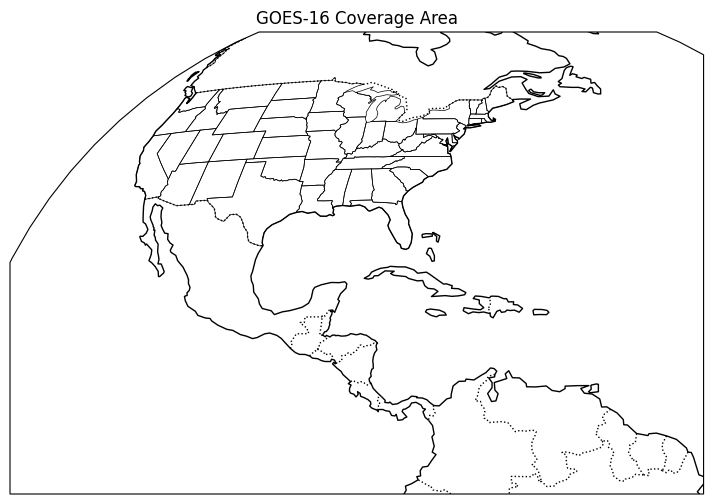

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.Geostationary(central_longitude=-75)})

ax.set_extent([-130, -50, 0, 60], crs=ccrs.PlateCarree())  # Approximate GOES-16 coverage
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor="black")

plt.title("GOES-16 Coverage Area")
plt.show()


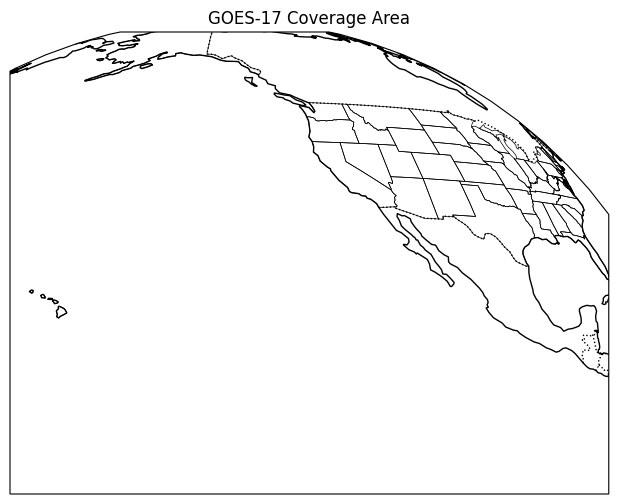

In [ ]:
fig, ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.Geostationary(central_longitude=-137)})

ax.set_extent([-160, -90, 0, 70], crs=ccrs.PlateCarree())  # GOES-17 coverage region
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor="black")

plt.title("GOES-17 Coverage Area")
plt.show()


Next, create three different visuals for each region. First, do a 24 hr animation of the day with the highest FED. Then, do a 30 day animation with a heat map of lightning for each day. Finally, make a heat map for the total month.

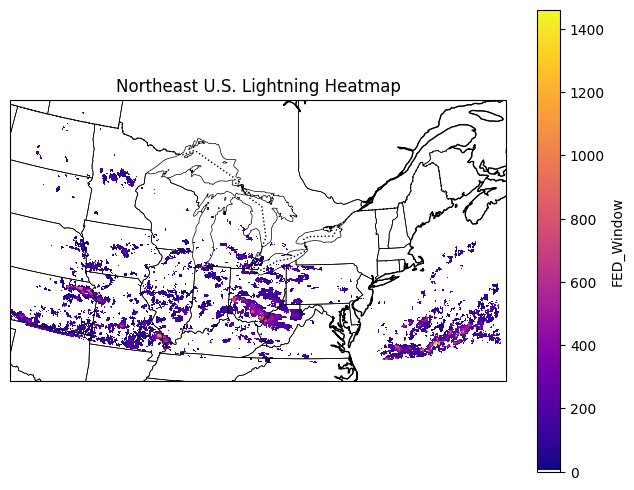

In [29]:
import matplotlib.colors as mcolors

heatmap = aprilNE_fed["FED_Window"].sum(dim="time")

fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-80, central_latitude=42)})
cmap = plt.get_cmap("plasma") 
new_cmap = cmap(np.arange(cmap.N)) 

new_cmap[0, -1] = 0
transparent_cmap = mcolors.ListedColormap(new_cmap)
ax.set_extent([-100, -65, 35, 50], crs=ccrs.PlateCarree())

p = heatmap.plot(
    ax=ax, 
    x='lon', y='lat', 
    transform=ccrs.PlateCarree(),
    cmap=transparent_cmap,
    add_colorbar=True
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor="black")
plt.title("Northeast U.S. Lightning Heatmap")
plt.show()

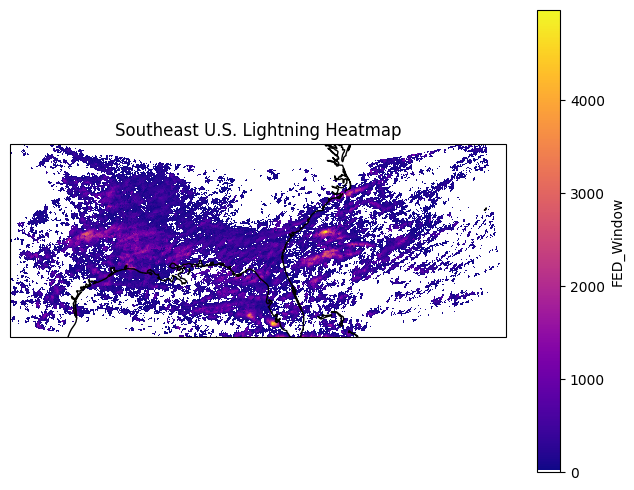

In [28]:
heatmap = aprilSE_fed["FED_Window"].sum(dim="time")

fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-85, central_latitude=32)})

cmap = plt.get_cmap("plasma")  
new_cmap = cmap(np.arange(cmap.N))  
new_cmap[0, -1] = 0  
transparent_cmap = mcolors.ListedColormap(new_cmap)

ax.set_extent([-102, -65, 25, 37], crs=ccrs.PlateCarree())  # ✅ SE Bounds

p = heatmap.plot(
    ax=ax, 
    x='lon', y='lat', 
    transform=ccrs.PlateCarree(),
    cmap=transparent_cmap,
    add_colorbar=True
)

ax.add_feature(cfeature.COASTLINE)

plt.title("Southeast U.S. Lightning Heatmap")
plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation


# Function to update the plot for each frame (time step)
def update_plot(frame):
    ax.clear()  # Clear the axis for a new plot
    
    # Select the data for the given time frame
    FED_slice = Flash_extent_density['__xarray_dataarray_variable__'].isel(time=frame)  # Replace with actual variable name
    
    # Plot the data
    im = FED_slice.plot(
        x='longitude', y='latitude',  # Replace with actual coordinate names
        cmap='viridis',
        ax=ax,
        transform=ccrs.PlateCarree(),  # Ensure proper coordinate transformation
        add_colorbar=False
    )
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    
    # Set map extent (adjust based on your region of interest)
    ax.set_extent([-110, -70, 25, 45], crs=ccrs.PlateCarree())
    
    # Add title and labels
    ax.set_title(f'Flash Extent Density at Hour: {str(FED_slice.time.values)}')
    return im

# Create the figure and axis with Cartopy projection
fig, ax = plt.subplots(
    figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()}
)

# Set up the animation
ani = FuncAnimation(
    fig, update_plot, frames=len(Flash_extent_density.time), repeat=True
)

# Save the animation as a GIF
ani.save('Flash_Extent_Density_Animation_Cartopy.gif', writer='pillow', fps=2)

# Optional: Show the animation (for debugging)
plt.show()

Save these figures for later.

At the moment, we have temporally smoothed the data, but now we want to spatially smooth the data in order to make meaningful comparisons with lower resolution datasets (ERA5). 

Run parallel_interp on each day of the data. Try out parallelism for this as well, keep worker numbers low though.

Repeat the visualization process, and compare to previous figures. 

We have now visually confirmed the quality of the data.


Now, we will introduce the environmental variables to our EDA. Use retrieve ABI to download ABI data variables of interest for the month. You can use parallel processing again for this, 10-16 workers max. Verify the data in the same way we verified the lightning data.

Getting ERA5 Data is simple and relatively fast, so use the cdsapi and retrieve it for this month.

We can do some simple checks for the ERA5 data, but it is likely that there are no direct issues as the ECMFW is a trusted organization responsible for this reanalysis data.

Now we will begin correlation analysis. How do we do this? By using xarray’s .corr which measures the linear pearson correlation coefficient for datasets across a specified dimension (i. e. time, space, etc)
Note: Make sure to cite parameterizations.


Perform correlational analysis spatially, temporally, and spatiotemporally

* Lightning vs Individual Controls
* Individual Control vs Individual Controls
* Lightning vs Parameterizations 
* Parameterizations vs Individual Controls
* Parameterizations vs Parameterizations